In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time
from datetime import date
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key, g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
gmaps.configure(api_key=g_key)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:

# set up lists to hold reponse info
response_info = [[],[],[],[],[],[]]
invalid_cities = []
# Loop through the list of cities and perform a request for data on each
i = 0
j = 1
for city in cities:
    i += 1
    response = requests.get(query_url + city).json()
    try:
        print(f"Processing Record {i} of set {j} | {city}")
        response_info[0].append(response['coord']['lon'])
        response_info[1].append(response['coord']['lat'])
        response_info[2].append(response['main']['temp_max'])
        response_info[3].append(response['main']['humidity'])
        response_info[4].append(response['clouds']['all'])
        response_info[5].append(response['wind']['speed'])
    except:
        print("City not found. Skipping...")
    if i >= 50:
        print("sleeping")
        i = 0;
        j += 1;
        time.sleep(60)

Processing Record 1 of set 1 | merauke
Processing Record 2 of set 1 | yarada
Processing Record 3 of set 1 | marathon
Processing Record 4 of set 1 | punta arenas
Processing Record 5 of set 1 | touros
Processing Record 6 of set 1 | pandan
Processing Record 7 of set 1 | leningradskiy
Processing Record 8 of set 1 | rikitea
Processing Record 9 of set 1 | caravelas
Processing Record 10 of set 1 | fougeres
Processing Record 11 of set 1 | albany
Processing Record 12 of set 1 | zhetysay
Processing Record 13 of set 1 | bredasdorp
Processing Record 14 of set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of set 1 | abu dhabi
Processing Record 16 of set 1 | kapaa
Processing Record 17 of set 1 | castro
Processing Record 18 of set 1 | malmyzh
Processing Record 19 of set 1 | san cristobal
Processing Record 20 of set 1 | hermanus
Processing Record 21 of set 1 | severo-kurilsk
Processing Record 22 of set 1 | labuhan
Processing Record 23 of set 1 | ushuaia
Processing Record 24 of set 1 |

Processing Record 40 of set 4 | tarko-sale
Processing Record 41 of set 4 | bequimao
Processing Record 42 of set 4 | samalaeulu
City not found. Skipping...
Processing Record 43 of set 4 | quirinopolis
Processing Record 44 of set 4 | comodoro rivadavia
Processing Record 45 of set 4 | college
Processing Record 46 of set 4 | along
Processing Record 47 of set 4 | mananjary
Processing Record 48 of set 4 | ralivka
Processing Record 49 of set 4 | taraz
Processing Record 50 of set 4 | marsa matruh
sleeping
Processing Record 1 of set 5 | mikhaylov
Processing Record 2 of set 5 | nantucket
Processing Record 3 of set 5 | vestmannaeyjar
Processing Record 4 of set 5 | viedma
Processing Record 5 of set 5 | kotido
Processing Record 6 of set 5 | grand river south east
City not found. Skipping...
Processing Record 7 of set 5 | kloulklubed
Processing Record 8 of set 5 | isangel
Processing Record 9 of set 5 | cornwall
Processing Record 10 of set 5 | alotau
City not found. Skipping...
Processing Record 11 o

Processing Record 30 of set 8 | senekal
Processing Record 31 of set 8 | hovd
Processing Record 32 of set 8 | san patricio
Processing Record 33 of set 8 | prado
Processing Record 34 of set 8 | bridlington
Processing Record 35 of set 8 | fort saint james
Processing Record 36 of set 8 | glushkovo
Processing Record 37 of set 8 | kuliyapitiya
Processing Record 38 of set 8 | teguise
Processing Record 39 of set 8 | mogadishu
Processing Record 40 of set 8 | healesville
Processing Record 41 of set 8 | bundaberg
Processing Record 42 of set 8 | muhlhausen
Processing Record 43 of set 8 | yumen
Processing Record 44 of set 8 | hualmay
Processing Record 45 of set 8 | bagaha
Processing Record 46 of set 8 | hihifo
City not found. Skipping...
Processing Record 47 of set 8 | aflu
City not found. Skipping...
Processing Record 48 of set 8 | opuwo
Processing Record 49 of set 8 | douglas
Processing Record 50 of set 8 | jaipur hat
City not found. Skipping...
sleeping
Processing Record 1 of set 9 | berlevag
Pr

Processing Record 15 of set 12 | puri
Processing Record 16 of set 12 | grand-santi
Processing Record 17 of set 12 | sistranda
Processing Record 18 of set 12 | wattegama
Processing Record 19 of set 12 | hailar
Processing Record 20 of set 12 | lyngseidet
Processing Record 21 of set 12 | salinas
Processing Record 22 of set 12 | kiunga
Processing Record 23 of set 12 | paamiut
Processing Record 24 of set 12 | arvin
Processing Record 25 of set 12 | aginskoye
Processing Record 26 of set 12 | shevchenkove
Processing Record 27 of set 12 | nishihara
Processing Record 28 of set 12 | slupsk
Processing Record 29 of set 12 | boulder
Processing Record 30 of set 12 | aquiraz
Processing Record 31 of set 12 | mayumba
Processing Record 32 of set 12 | makung
City not found. Skipping...
Processing Record 33 of set 12 | bangkal
Processing Record 34 of set 12 | olafsvik
Processing Record 35 of set 12 | wenling
Processing Record 36 of set 12 | halalo
City not found. Skipping...
Processing Record 37 of set 12 

In [31]:
df = pd.DataFrame(list(zip(cities, *response_info)), \
                        columns = ['City', 'Longitude', 'Latitude', 'Max Temperature', 'Humidity', 'Cloudiness', 'Wind Speed']) \
                        .set_index('City')
df.to_csv('city_weather.csv')

In [32]:
df.loc[df['Humidity'] > 90]

,Longitude,Latitude,Max Temperature,Humidity,Cloudiness,Wind Speed
City,,,,,,
caravelas,-39.2481,-17.7125,74.03,93,67,3.38
fougeres,-1.2000,48.3500,36.68,92,28,2.84
bredasdorp,20.0403,-34.5322,63.28,92,25,3.51
castro,50.6818,56.5205,1.44,97,99,5.70
labuhan,-68.3000,-54.8000,46.63,96,100,3.42
...,...,...,...,...,...,...
nazarovo,110.3000,54.3000,-5.69,95,75,1.41
yining,109.4833,30.3000,40.44,99,100,0.81
grand-santi,36.9333,-4.2000,59.58,96,55,2.39


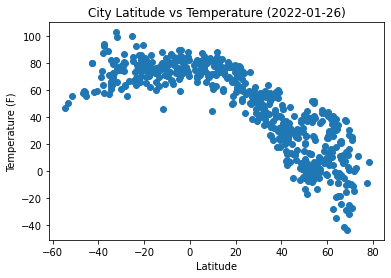

In [8]:
x=df['Latitude']
y=df['Max Temperature']
plt.title(f"City Latitude vs Temperature ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.scatter(x,y)
plt.show()

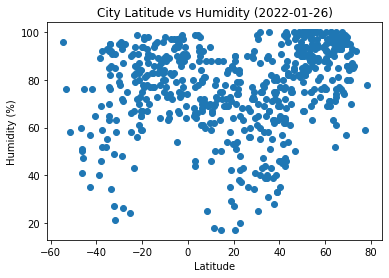

In [9]:
x=df['Latitude']
y=df['Humidity']
plt.title(f"City Latitude vs Humidity ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(x,y)
plt.show()

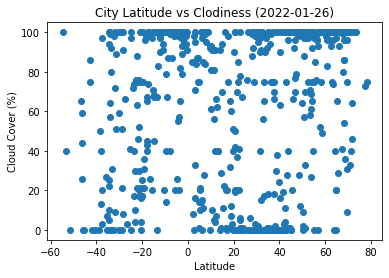

In [10]:
x=df['Latitude']
y=df['Cloudiness']
plt.title(f"City Latitude vs Clodiness ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover (%)")
plt.scatter(x,y)
plt.show()

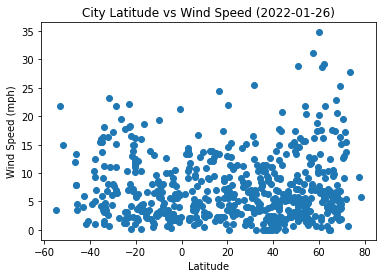

In [11]:
x=df['Latitude']
y=df['Wind Speed']
plt.title(f"City Latitude vs Wind Speed ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(x,y)
plt.show()

Text(0.5, 0.98, 'Linear Regression of Latitude vs Temperature (2022-01-26)')

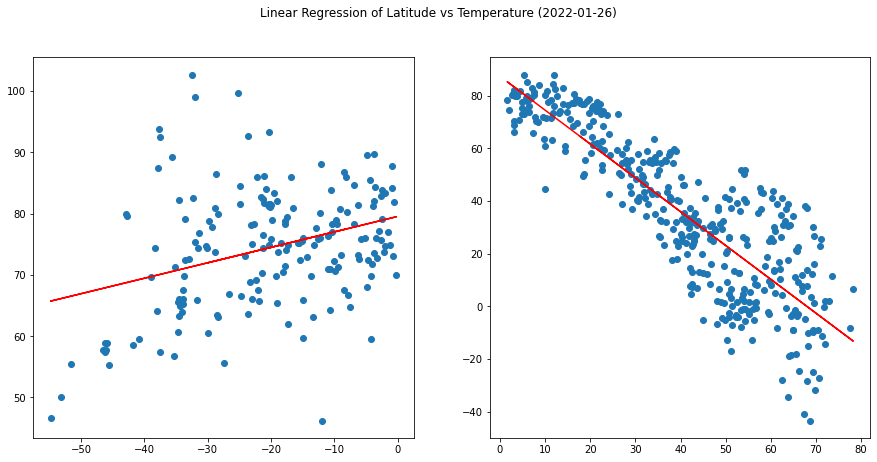

In [12]:
neglat = df.loc[df['Latitude'] < 0]
poslat = df.loc[df['Latitude'] >= 0]
x1, y1 = neglat['Latitude'], neglat['Max Temperature']
x2, y2 = poslat['Latitude'], poslat['Max Temperature']
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7) )
slope1, intercept1, rvalue1, pvalue1, stderr1 = linregress(x1,y1)
slope2, intercept2, rvalue2, pvalue2, stderr2 = linregress(x2,y2)
ax1.scatter(x1,y1)
ax1.plot(x1, slope1 * x1 + intercept1, color = 'r')
ax2.scatter(x2,y2)
ax2.plot(x2, slope2 * x2 + intercept2, color = 'r')
fig.suptitle(f"Linear Regression of Latitude vs Temperature ({date.today()})")

Text(0.5, 0.98, 'Linear Regression of Latitude vs Humidity (2022-01-26)')

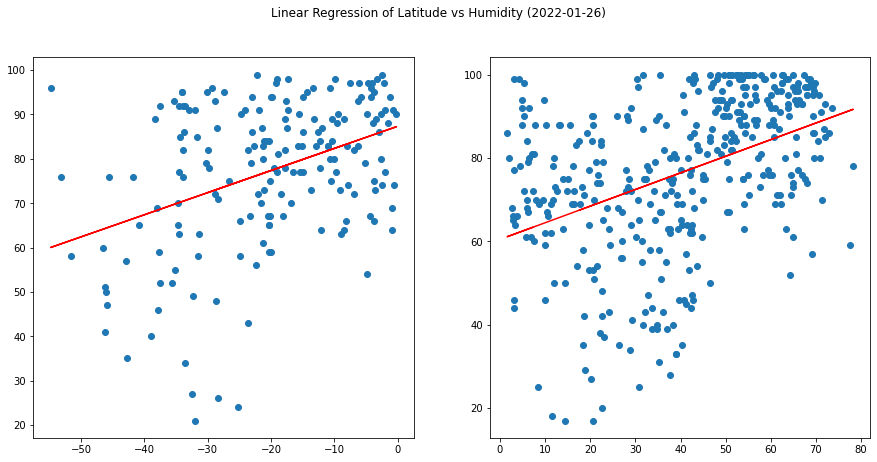

In [13]:
x1, y1 = neglat['Latitude'], neglat['Humidity']
x2, y2 = poslat['Latitude'], poslat['Humidity']
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7) )
slope1, intercept1, rvalue1, pvalue1, stderr1 = linregress(x1,y1)
slope2, intercept2, rvalue2, pvalue2, stderr2 = linregress(x2,y2)
ax1.scatter(x1,y1)
ax1.plot(x1, slope1 * x1 + intercept1, color = 'r')
ax2.scatter(x2,y2)
ax2.plot(x2, slope2 * x2 + intercept2, color = 'r')
fig.suptitle(f"Linear Regression of Latitude vs Humidity ({date.today()})")

Text(0.5, 0.98, 'Linear Regression of Latitude vs Cloud Cover (2022-01-26)')

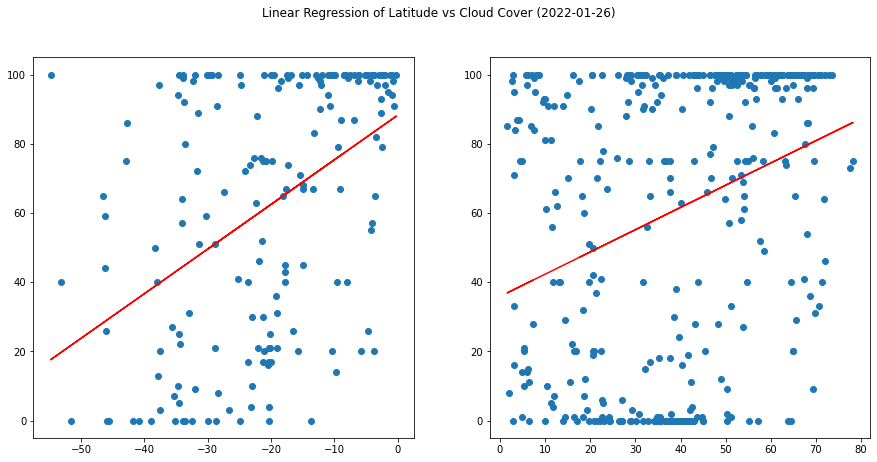

In [14]:
x1, y1 = neglat['Latitude'], neglat['Cloudiness']
x2, y2 = poslat['Latitude'], poslat['Cloudiness']
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7) )
slope1, intercept1, rvalue1, pvalue1, stderr1 = linregress(x1,y1)
slope2, intercept2, rvalue2, pvalue2, stderr2 = linregress(x2,y2)
ax1.scatter(x1,y1)
ax1.plot(x1, slope1 * x1 + intercept1, color = 'r')
ax2.scatter(x2,y2)
ax2.plot(x2, slope2 * x2 + intercept2, color = 'r')
fig.suptitle(f"Linear Regression of Latitude vs Cloud Cover ({date.today()})")

Text(0.5, 0.98, 'Linear Regression of Latitude vs Wind Speed (2022-01-26)')

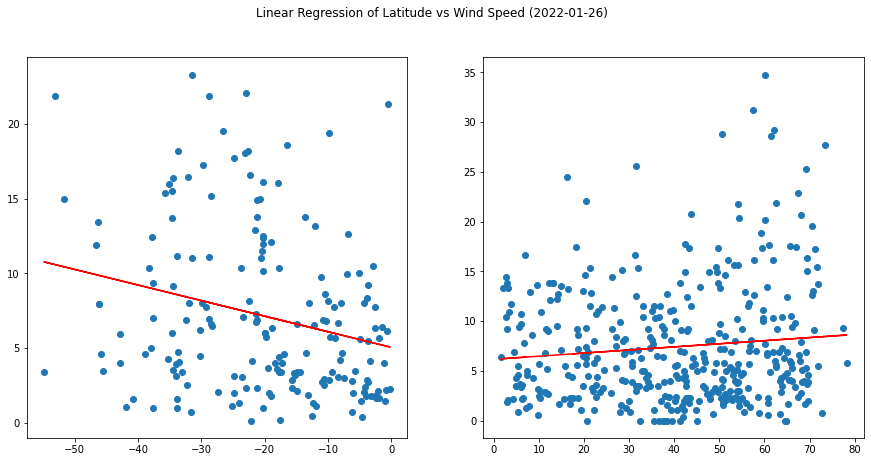

In [15]:
x1, y1 = neglat['Latitude'], neglat['Wind Speed']
x2, y2 = poslat['Latitude'], poslat['Wind Speed']
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7) )
slope1, intercept1, rvalue1, pvalue1, stderr1 = linregress(x1,y1)
slope2, intercept2, rvalue2, pvalue2, stderr2 = linregress(x2,y2)
ax1.scatter(x1,y1)
ax1.plot(x1, slope1 * x1 + intercept1, color = 'r')
ax2.scatter(x2,y2)
ax2.plot(x2, slope2 * x2 + intercept2, color = 'r')
fig.suptitle(f"Linear Regression of Latitude vs Wind Speed ({date.today()})")

In [21]:
locs = df[["Latitude", "Longitude"]]
humidity = df["Humidity"]
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locs, weights=humidity, 
                                 dissipating=False, max_intensity=150,
                                 point_radius=4)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))